# DS 3000 - DS Practicum 3

**Student Name**: Tin Wan Jared Tung, Carlie Chin, Michael Danzi, Elizabeth Niemiec

**Date**: 4-7-2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In your own words, formulate the Data Science problem.

This data science project aims to develop a predictive model that is able to classify individuals into one of the three categories; diabetic, pre-diabetic or non-diabetic. We retrieve various aspects of health, including BMI, physical activity, smoking status, feelings of general health, as well as their demographic and behavioral counterparts through the use of CDC Diabetes Health Indicators based on the Behavioral Risk Factor Surveillance System (BRFSS) data. The problem is multi-class classification and its goal is the discovery of relationships and patterns between these health indicators and the diabetes outcomes. Developing an accurate and reliable machine learning model is the basis to provide inputs to key diabetes risk factors, and for early identification of diabetes risk individuals. The solution can ultimately provide guidance to public health strategies and assist in preventative healthcare programming mechanisms by providing a more specific and data driven intervention.

## Question 2: 

- Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
- Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 

In [7]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

# Step 1: Define column types
binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_cols = ['GenHlth', 'Education', 'Income']  # Ordinal scales
target_col = 'Diabetes_012'  # Multi-class target: 0 = no diabetes, 1 = pre-diabetic, 2 = diabetic

# Convert to category type
df[binary_cols + ordinal_cols + [target_col]] = df[binary_cols + ordinal_cols + [target_col]].astype('category')

# Step 3: Handle outliers in continuous columns
continuous_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age']

def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Remove outliers from continuous variables
for col in continuous_cols:
    df = remove_outliers_iqr(df, col)


Question 2 was started by data evaluation to make sure each variable has the right data type for machine learning modeling. HighBP, Smoker and Sex were converted typically to the category data type to indicate a categorical variable and makes the code run faster. Categorical variables were also treated as ordinal like GenHlth, Education, Income which have a meaningful ranked order. Similarly, Diabetes_012, which is the column for no diabetes, pre-diabetes, and diabetes was made a categorical variable with values for multi class classification.

Finally we checked for data integrity by verifying that there were no missing values present in the dataset as indicated in data dictionary and programmatically, the dataset had no null entries. We also examined the contents of each column to be sure that there was no such thing as -1 or a 99 for example. We had dealt with potential outliers on for continuous variables such as BMI, MentHlth, PhysHlth, and Age, by the Interquartile Range (IQR) method. It helped removing extreme values that can skew the model training and bad generalization. With these steps the dataset was clean, consistent, and formatted properly to be used in effective exploratory analysis and machine learning development.

## Question 3:

Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

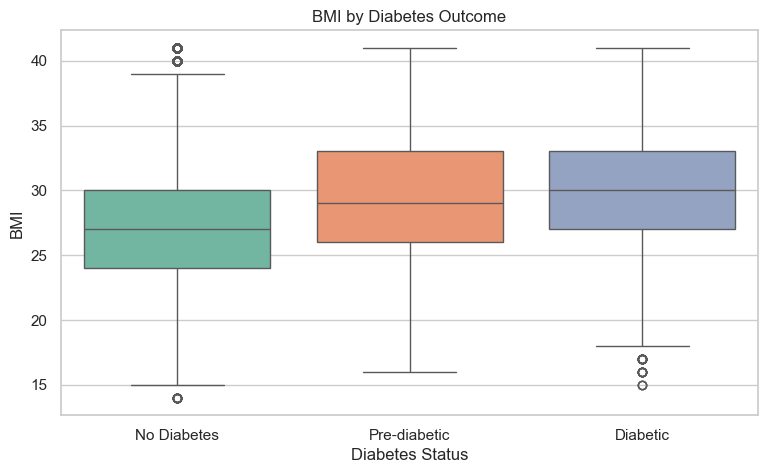

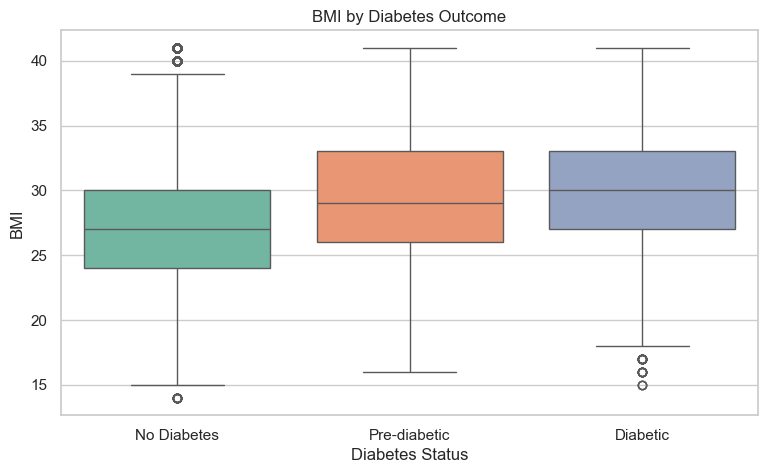

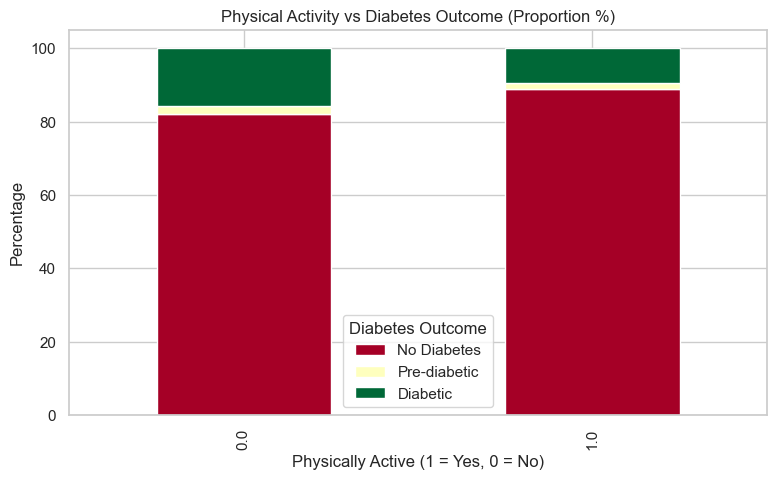

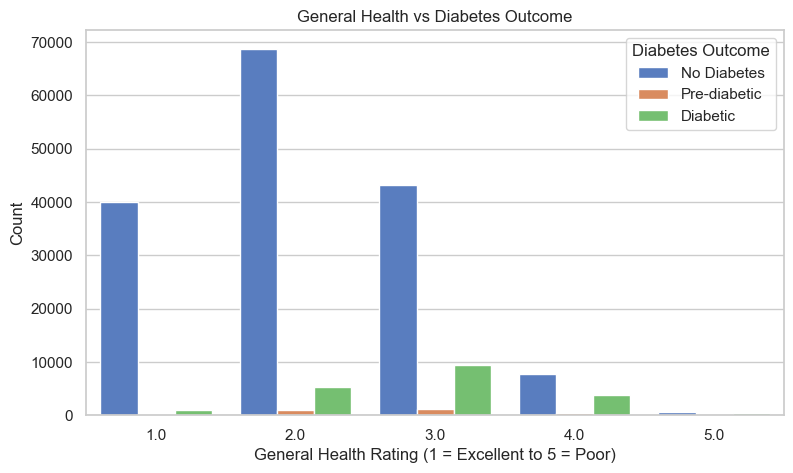

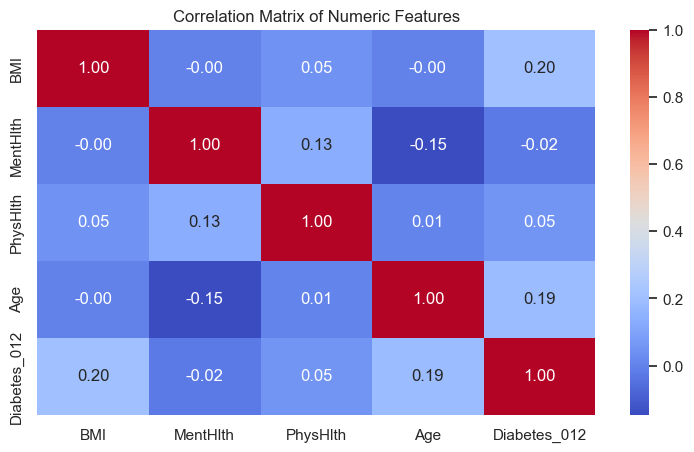

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (9, 5)

# Create readable diabetes class labels if not already done
diabetes_labels = {0: 'No Diabetes', 1: 'Pre-diabetic', 2: 'Diabetic'}
df['Diabetes_Label'] = df['Diabetes_012'].map(diabetes_labels)

# ----------------------------
# 1. AGE vs DIABETES (Boxplot)
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()


# ----------------------------
# 2. BMI vs DIABETES
# ----------------------------
sns.boxplot(data=df, x='Diabetes_Label', y='BMI', hue='Diabetes_Label', palette='Set2', dodge=False)
plt.title('BMI by Diabetes Outcome')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.legend([],[], frameon=False)
plt.show()

# ----------------------------
# 3. PHYSICAL ACTIVITY vs DIABETES (Stacked % Bar)
# ----------------------------
phys_df = pd.crosstab(df['PhysActivity'], df['Diabetes_Label'], normalize='index') * 100
phys_df.plot(kind='bar', stacked=True, colormap='RdYlGn')
plt.title('Physical Activity vs Diabetes Outcome (Proportion %)')
plt.xlabel('Physically Active (1 = Yes, 0 = No)')
plt.ylabel('Percentage')
plt.legend(title='Diabetes Outcome')
plt.show()

# ----------------------------
# 4. GENERAL HEALTH vs DIABETES
# ----------------------------
sns.countplot(data=df, x='GenHlth', hue='Diabetes_Label', palette='muted')
plt.title('General Health vs Diabetes Outcome')
plt.xlabel('General Health Rating (1 = Excellent to 5 = Poor)')
plt.ylabel('Count')
plt.legend(title='Diabetes Outcome')
plt.show()

# ----------------------------
# 5. CORRELATION HEATMAP (numeric only)
# ----------------------------
numeric_cols = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Diabetes_012']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


### 1. Age Distribution by Diabetes Outcome (Boxplot)
Age boxplot has a clear and meaningful trend across the three classes of diabetes. The average age of pre diabetic individuals is between diabetics who are significantly older. Median age increases steadily over the left to right; spread (interquartile range) is also positively correlated to the left to right. This serves as an affirmation that diabetes is a serious age-related risk factor, which as we know in accordance with general mediloinal knowledge, the more time one spends under stressful lifestyle conditions or metabolic stress, the more likely he or she is to become insulin resistant and develop diabetes.

### 2. BMI by Diabetes Outcome (Boxplot)
The box plot of BMI shows that there is strong association of higher BMI with diabetes status. Those with pre diabetes have much higher BMI than non-diabetics and those with diabetes have even higher BMI. The diabetic group has a hypertension, with a narrower interquartile range indicating that obesity in diabetics is both common and consistent. Clinical evidence in support is that excess body fat is one of the strongest predictors of diabetes, particularly Type 2, which is driven by insulin resistance.

### 3. Physical Activity vs. Diabetes Outcome (Stacked Percentage Bar Chart)
The bars are stacked to show the proportion of diabetes classes in each physical activity group. Those who are physically inactive have a higher diabetic status than those who practice regular physical activities. This, conversely, represents a very large share of non diabetics for individuals who are active. Physical activity is a protective factor for both pre-diabetes and diabetes since it reduced the risk. This provides stark contrast in class proportions which advocates a lifestyle intervention for prevention.

### 4. General Health Rating vs. Diabetes Outcome (Grouped Bar Chart)
A strong inverse relationship between self-reported general health and whether or not a person has diabetes can be seen in this chart. Individuals who give a poor rating to their health (5) are much more prone to be diabetic while those who have excellent judgment (1) are almost all non-diabetic. Middle categories cluster pre diabetics. These results imply that perceived health status can predict actual metabolic status well and thus be used as a good variable for early screening or risk profile.

### 5. Correlation Matrix (Heatmap of Numeric Features)
The correlation heatmap offers a quantification of numeric features with respect to their diabetic status. Age and BMI are the variables with the strongest positive correlations to the diabetes outcome, as is expected. In addition, PhysHlth and MentHlth have moderate positive correlation, which suggests the general decrease in health of diabetics. The correlations aren’t that high, since the problem is multi class and categorical, but they do a good job of guiding feature selection by showing you variables with which there are meaningful statistical relationships.




## Question 4a:

- Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.

- Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.

Note: if you are using correlations, ensure that this is only performed using continuous variables.

## Question 4b:

This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following

(1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.

OR

(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

## Question 5

- Partition the data into train/test sets. After which, perform the following:
    - encode any categorical data. Ensure that categorical variables are represented correctly.
    - normalize numeric data.
    
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

## Question 6

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
- Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
- Use GridSearchCV to tune at least two hyperparameters for each algorithm.
- Note: do not change the input features in your experiments.

## Question 7

Analyze the evaluated models. For each algorithm, ensure that you:
- Display: 1) the best model and 2) the best score that was obtained.
- Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.

NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

## Question 8

- Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
- Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.


## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
